###  UNIFOR - Mestrado em Inteligência Artificial e Ciência de Dados
### Discipplina: Análise de Dados em Grafos
#### Professor: Raimir
#### Equipe: Maurício Brito, João David e Tiago Pontes  
  
### Problema do Caixeiro Viajante (TSP)
Suponha um vendedor de produtos que atua em várias cidades, algumas das quais são conectadas por estradas. O trabalho do vendedor  
exige que ele visite cada uma das cidades.  
- É possível para ele planejar uma viagem de carro, partindo e voltando a uma mesma cidade, visitando cada uma das cidades exatamente uma vez?
- Se tal viagem for possível, é viável planejá-la de maneira a minimizar a distância total percorrida?  

As perguntas propostas são:
- O grafo G é um grafo Hamiltoniano ?
- Se for, é possível construir um ciclo hamiltoniano de peso (comprimento) mínimo ?

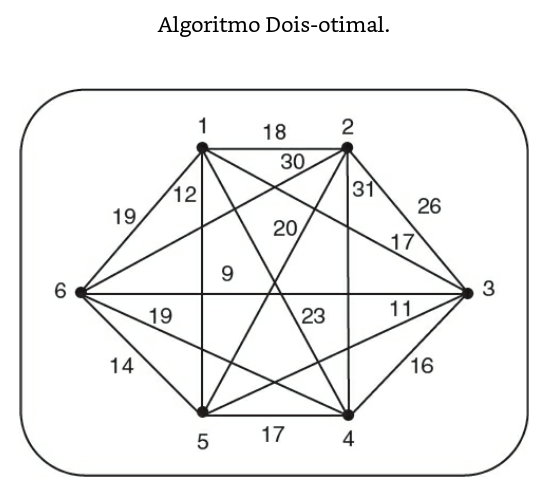

In [1]:
import networkx as nx
from networkx.algorithms.tournament import hamiltonian_path
import numpy as np

#### GRAFO COMPLETO
Um grafo completo é um grafo simples em que todo vértice é adjacente a todos os outros vértices. O grafo completo de n vértices é frequentemente denotado por Kn
Um grafo Kn possui o número máximo possível de arestas para um dados n. Ele é, também regular-(n-1) pois todos os seus vértices tem grau n-1.

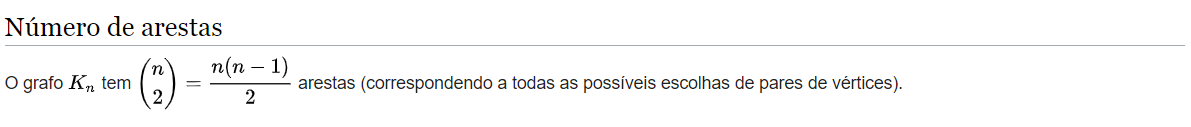

In [ ]:
# # Gera um gravo completo com n vértices (vértice iniciando do 1)
# def gera_G_completo(n):
#     G = nx.Graph()
#     for i in range(1,n+1):
#         G.add_node(i, color='k')
#         for j in range(i+1, n+1):
#             G.add_edge(i, j)
#     return G

In [23]:
# Gera um gravo completo com n vértices(vértice iniciando do 0)
def gera_G_completo(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
        for j in range(i+1, n):
            G.add_edge(i, j, color='black')
    return G

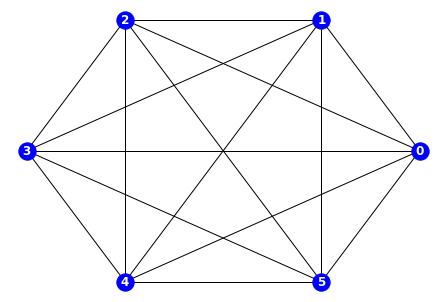

In [24]:
G = gera_G_completo(6)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color='b')

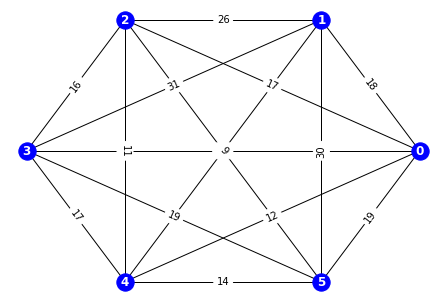

In [26]:
# Inclui os pesos de cada aresta a partir de uma matriz
def inclui_pesos_from_matriz(G, matriz):
    for e in G.edges():
        peso = matriz[e[0]][e[1]]
#         print(f'Peso da aresta {e} = {peso}')
        G[e[0]][e[1]]['weight'] = peso
    
    # Obtém atributos das arestas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    pos=nx.circular_layout(G)
    # Create edge labels
    # labels = {e: str(e) for e in G.edges}
    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b')
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

cost_mat = np.array([
    [0, 18, 17, 23, 12, 19],
    [18, 0, 26, 31, 20, 30],
    [17, 26, 0, 16, 11, 9],
    [23, 31, 16, 0, 17, 19],
    [12, 20, 11, 17, 0, 14],
    [19, 30, 9, 19, 14, 0],
])
inclui_pesos_from_matriz(G, cost_mat)
# nx.get_edge_attributes(G1,'weight')

In [ ]:
# Inclui os pesos de cada aresta a partir do INPUT do usuário
def inclui_pesos_arestas(G):
    matriz = np.zeros((len(G),len(G)), dtype=int)
    for e in G.edges():
        print(f'Qual o peso da aresta {e}?')
        peso = input()
        G[e[0]][e[1]]['weight'] = peso
        matriz[e[0]][e[1]] = matriz[e[1]][e[0]] = peso
    
    # Obtém atributos das arestas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    pos=nx.circular_layout(G)
    # Create edge labels
    # labels = {e: str(e) for e in G.edges}
    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b')
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    return matriz
cost_mat = inclui_pesos_arestas(G)
# nx.get_edge_attributes(G,'weight')

#### Teorema de Dirac, 1952
Seja G = (V,E) um grafo simples com n vértices, n ≥ 3. Se para todo vértice v ∈ V, d(v) ≥ n/2, então G é hamiltoniano.

In [28]:
# Checa se o grafo tem mais de 3 vértics e se todos os vértices tem grau >= n/2
def checa_graus(G):
    condicao = []
    n = len(list(G.degree()))
    if n < 3:
        condicao.append(False)
    for v in G.degree():
        # checa se cada vértice tem grau >= n/2
        condicao.append(True if v[1] >= n/2 else False)
    if False in condicao:
        print("NÃO podemos afirmar que é Hamiltoniano.")
    else:
        print("O grafo É Hamiltoniano.")
    print(condicao)
checa_graus(G)

O grafo É Hamiltoniano.
[True, True, True, True, True, True]


In [41]:
# Apresenta o caminho no grafo
def mostra_caminho(G, caminho):
    edge_labels = nx.get_edge_attributes(G, 'weight')
    colors = nx.get_edge_attributes(G,'color')
    e2 = 1
    for e1 in range(len(caminho)-1):
        G.add_edge(caminho[e1], caminho[e2], color="green")
        e2 += 1

    colors = nx.get_edge_attributes(G,'color').values()
    pos=nx.circular_layout(G)

    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b', edge_color=colors)
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Calcula a soma dos pesos das arestas no caminho indicado
def cost(cost_mat, caminho):
#     print(f'Caminho: {caminho} - Distância:{cost_mat[np.roll(caminho, 1), caminho].sum()}')
    return cost_mat[np.roll(caminho, 1), caminho].sum()

# def encontra_caminho_hamiltoniano(G):
def dois_otimal(caminho):
    melhor = caminho
    melhorou = True
    contador = 0
    while melhorou:
        melhorou = False
#         print("Melhor Caminho:", caminho)
        for i in range(1, len(caminho)-2):
            for j in range(i+1, len(caminho)):
                contador += 1
                if j-i == 1: continue # permanece
                novo_caminho = caminho[:]
                novo_caminho[i:j] = caminho[j-1:i-1:-1] # faz a troca (2-optimal)
                if cost(cost_mat, novo_caminho) < cost(cost_mat, melhor):  # Verifica menores pesos/custo/distância
                        melhor = novo_caminho
                        cost_melhor = cost(cost_mat, melhor)
                        melhorou = True
        caminho = melhor
    print("Contador:", contador)
    return melhor, cost_melhor

melhor_caminho, distancia = dois_otimal([0,1,2,3,4,5,0])
print(f'Melhor Caminho: {melhor_caminho} - Distância:{distancia}')

Contador: 28
Melhor Caminho: [0, 1, 4, 3, 2, 5, 0] - Distância:99


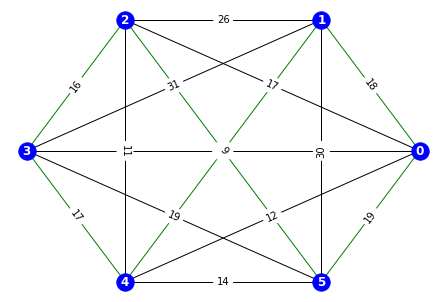

In [42]:
mostra_caminho(G, melhor_caminho)